# Проект: Исследование стартапов

## Введение

Необходимо подготовить датасет для разработки модели бизнеса финансовой компании, занимающейся стартапами. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.<br>
**Цель проекта<br>**
Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.
Выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании

**Ключевые моменты исследования:<br>**
Шаг 1. Знакомство с данными: загрузка и первичная предобработка
- 1.1. Вывод общей информации, исправление названия столбцов
- 1.2. Смена типов и анализ пропусков<br>
Шаг 2. Предобработка данных, предварительное исследование
- 2.1. Раунды финансирования по годам
- 2.2. Люди и их образование
- 2.3. Оценим, можно ли использовать столбцы с именем network_username для объединения данных.
- 2.4. Проблемный датасет company_and_rounds.csv и причина возникновения пропусков<br>
Шаг 3. Исследовательский анализ объединённых таблиц
- 3.1. Объединение данных
- 3.2. Анализ выбросов
- 3.3. Анализ стартапов проданных за 0 или 1 $
- 3.4. Цены стартапов по категориям
- 3.5. Сколько раундов продержится стартап перед покупкой<br>
Шаг 4. Итоговый вывод и рекомендации


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузим все данные по проекту.
- Проверим названия столбцов.
- Выведим информацию, которая необходима для принятия решений о предобработке, для каждого из датасетов.

In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Загрузим данные по проекту
df_acquisition = pd.read_csv('acquisition.csv')
df_company_and_rounds = pd.read_csv('company_and_rounds.csv')
df_people = pd.read_csv('people.csv')
df_education = pd.read_csv('education.csv')
df_degrees = pd.read_csv('degrees.csv')
df_fund = pd.read_csv('fund.csv')
df_investment = pd.read_csv('investment.csv')

**1** Таблица acquisition
Содержит информацию о покупках одними компаниями других компаний:
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.

In [3]:
display(df_acquisition.info())
display(df_acquisition.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


None

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


**6 столбцов, 9407 строк. В столбцах term_code, acquired_at пропуски. Нужно проверить тип данных столбца с временем.**

**2** Таблица company_and_rounds
Содержит информацию о компаниях и раундах финансирования:
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.

In [4]:
display(df_company_and_rounds.info())
display(df_company_and_rounds.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

None

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**22 столбца, 217774 строк.  Названия столбцов необходимо привести к стилю snake_case. Столбец company_id появляется в датасете дважды. Возможно это связано с тем, что таблица была получена путем объединения двух таблиц. Во всех столбцах есть пропуски. Нужно проверить тип данных столбцов с временем.**

**3** Таблица education
Содержит информацию об образовании сотрудника:
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

In [5]:
display(df_education.info())
display(df_education.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


None

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


**4 столбца, 109610 строк. В столбцах institution, graduated_at есть пропуски. Нужно проверить тип данных столбцов с временем.**

**4** Таблица people
Содержит информацию о сотрудниках:
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.


In [6]:
display(df_people.info())
display(df_people.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


None

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


**5 столбцов, 226709 строк. Во всех столбцах есть пропуски, кроме id**

**5** Таблица degrees
Содержит информацию о типе образования сотрудника:
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.

In [7]:
display(df_degrees.info())
display(df_degrees.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


None

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


**5 столбцов, 109610 строк. В столбцах degree_type,subject есть пропуски. Также похожи поля object_id в degrees_df и person_id в education_df**

**Первичная оценка: очень много пропусков, неправильные названия столбцов, неправильные типы данных.**

### 1.2. Смена типов

- Изменим типы данных в столбцах, которые хранят значения даты и времени.

Переименуем названия столбцов таблицы df_company_and_rounds.

In [8]:
df_company_and_rounds = df_company_and_rounds.rename(columns = {'company  ID' : 'company_id',
                                        'category  code' :  'category_code',
                                        'founded  at' : 'founded_at',
                                        'closed  at' : 'closed_at',
                                        'founded  at' : 'founded_at',
                                        'network  username' : 'network_username',
                                        'country  code' : 'country_code',
                                        'investment  rounds' : 'investment_rounds',
                                        'funding  rounds' : 'funding_rounds',
                                        'funding  total' : 'funding_total',
                                        'funding  round  id' : 'funding_round_id',
                                        'company  id' : 'company_id_second',
                                        'funded  at' : 'funded_at',
                                        'funding  round  type' : 'funding_round_type',
                                        'raised  amount' : 'raised_amount',
                                        'pre  money  valuation' : 'pre_money_valuation',
                                        'is  first  round' : 'is_first_round',
                                        'is  last  round' : 'is_last_round'})
print(df_company_and_rounds.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_second', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')


In [9]:
#Изменим тип данных столбца acquired_at таблицы df_acquisition
df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition['acquired_at'])
print(df_acquisition['acquired_at'].dtype)

datetime64[ns]


In [10]:
#Изменим тип данных столбцов founded_at, closed_at, funded_at таблицы df_company_and_rounds
df_company_and_rounds['founded_at'] = pd.to_datetime(df_company_and_rounds['founded_at'])
df_company_and_rounds['closed_at'] = pd.to_datetime(df_company_and_rounds['closed_at'])
df_company_and_rounds['funded_at'] = pd.to_datetime(df_company_and_rounds['funded_at'])
print(df_company_and_rounds['founded_at'].dtype,df_company_and_rounds['closed_at'].dtype,df_company_and_rounds['funded_at'].dtype)

datetime64[ns] datetime64[ns] datetime64[ns]


In [11]:
#Изменим тип данных столбца graduated_at таблицы df_education
df_education['graduated_at'] = pd.to_datetime(df_education['graduated_at'])
print(df_education['graduated_at'].dtype)

datetime64[ns]


 ### 1.3. Анализ пропусков

**Таблица df_acquisition** Пропуски в столбце term_code возможно связаны с тем, что дата сделки отличается от даты оплаты, немногие оплачивают услуги при совершении сделки.


In [12]:
print(round(df_acquisition.isna().mean(),2).sort_values(ascending = False))

term_code               0.81
id                      0.00
acquiring_company_id    0.00
acquired_company_id     0.00
price_amount            0.00
acquired_at             0.00
dtype: float64


**Таблица df_company_and_rounds** Такое количество пропусков возможно связано с тем, что эта таблица является результатом объединения двух других таблиц.

In [13]:
print(round(df_company_and_rounds.isna().mean(),2).sort_values(ascending = False))

closed_at              0.98
is_last_round          0.76
funded_at              0.76
is_first_round         0.76
participants           0.76
pre_money_valuation    0.76
raised_amount          0.76
funding_round_type     0.76
funding_round_id       0.76
company_id_second      0.76
network_username       0.56
founded_at             0.50
country_code           0.50
category_code          0.34
domain                 0.32
company_id             0.00
milestones             0.00
name                   0.00
funding_rounds         0.00
investment_rounds      0.00
status                 0.00
funding_total          0.00
dtype: float64


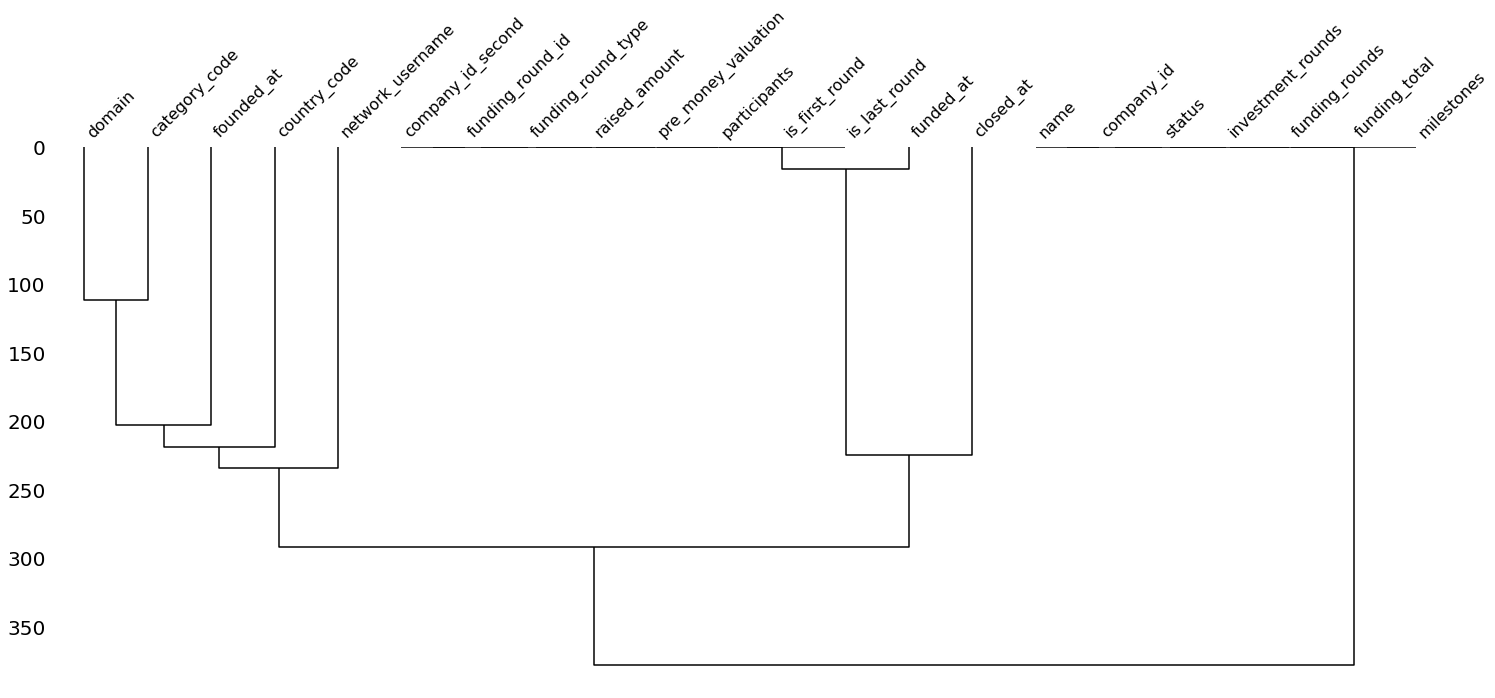

In [14]:
# Код ревьюера
# Метод dendrogram из библиотеки missingno
!pip install missingno -q
import missingno as msno
msno.dendrogram(df_company_and_rounds)
plt.show()

**Таблица df_education** Пропуски связаны скорее всего с тем, что человек все еще продолжает обучаться, поэтому даты выпуска нет.

In [15]:
print(round(df_education.isna().mean(),2).sort_values(ascending = False))

graduated_at    0.47
id              0.00
person_id       0.00
instituition    0.00
dtype: float64


**Таблица df_people** Пропуски возможно связаны с тем, что заполнение полей company_id, network_username  было необязательно.

In [16]:
print(round(df_people.isna().mean(),2).sort_values(ascending = False))

company_id          0.85
network_username    0.83
id                  0.00
first_name          0.00
last_name           0.00
dtype: float64


**Таблица df_degrees** Пропуск в столбце degree_type связаны скорее всего с тем, что человек все еще продолжает обучаться, специальность не указана возможно из за отсутсвия образования.


In [17]:
print(round(df_degrees.isna().mean(),2).sort_values(ascending = False))

subject        0.26
degree_type    0.10
id             0.00
object_id      0.00
dtype: float64


## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание выполнено без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составили сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставили в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы построили график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответили на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [18]:
#Добавим столбец только с годом
df_company_and_rounds['funded_at_year'] = df_company_and_rounds['funded_at'].dt.year
df_company_and_rounds['funded_at_year'] = df_company_and_rounds['funded_at_year'].fillna(0).astype('int32')

In [19]:
#Сводная таблица
raised_amount_table = pd.pivot_table(df_company_and_rounds, index = 'funded_at_year', values = 'raised_amount',aggfunc = ['median','count'])
raised_amount_table = raised_amount_table.reset_index()
display(raised_amount_table)

,funded_at_year,median,count
,,raised_amount,raised_amount
0,0,0.0,248
1,1960,0.0,9
2,1973,0.0,1
3,1974,0.0,2
4,1984,41000.0,3
5,1985,0.0,1
6,1987,1250000.0,2
7,1989,15000.0,1
8,1990,1000000.0,1


,funded_at_year,median_raised_amount,count_raised_amount
16,1999,2000000.0,76
17,2000,4200000.0,125
18,2001,3000000.0,96
19,2002,4200000.0,116
20,2003,3000000.0,159
21,2004,5000000.0,291
22,2005,5500000.0,1633
23,2006,5000000.0,2436
24,2007,3973320.0,3279
25,2008,3110000.0,3774


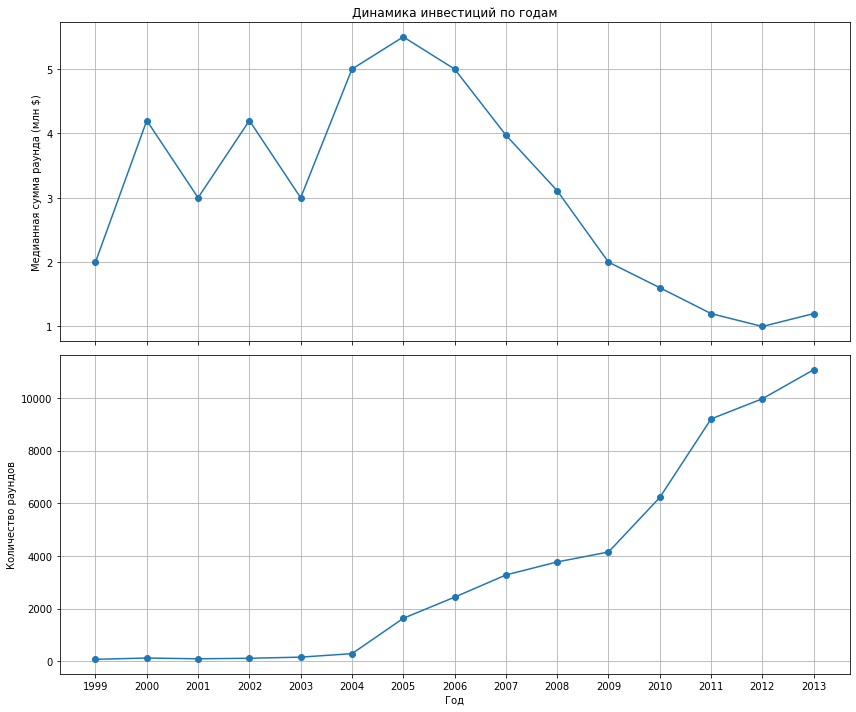

In [20]:
raised_amount_table.columns = ['funded_at_year','median_raised_amount','count_raised_amount']
raised_amount_table = raised_amount_table[raised_amount_table['count_raised_amount']>50]
raised_amount_table = raised_amount_table[raised_amount_table['funded_at_year']!=0]
display(raised_amount_table)
# Построение графика
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Первый график - медианная сумма финансирования
ax1.plot(raised_amount_table['funded_at_year'], 
         raised_amount_table['median_raised_amount']/1e6,  # Конвертируем в миллионы
         marker='o')
ax1.set_title('Динамика инвестиций по годам')
ax1.set_ylabel('Медианная сумма раунда (млн $)')
ax1.grid(True)
ax1.tick_params(axis='y')

# Второй график - количество раундов
ax2.plot(raised_amount_table['funded_at_year'], 
         raised_amount_table['count_raised_amount'],
         marker='o')
ax2.set_xlabel('Год')
ax2.set_ylabel('Количество раундов')
ax2.grid(True)

# Настройка оси X
plt.xticks(raised_amount_table['funded_at_year'].astype(int))  # Цена деления 1 год
plt.tight_layout()
plt.show()

**Максимальный типичный размер собранных в рамках одного раунда средств был в 2005 году. В 2013 было 11072 раунда и в среднем выделялось 1200000 $.**


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оценили, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделили все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оценили, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [21]:
#Присоеденим таблицы
merge = df_people.merge(df_education,left_on = 'id',right_on = 'person_id',how = 'left',suffixes = ('_employee','_edu'))

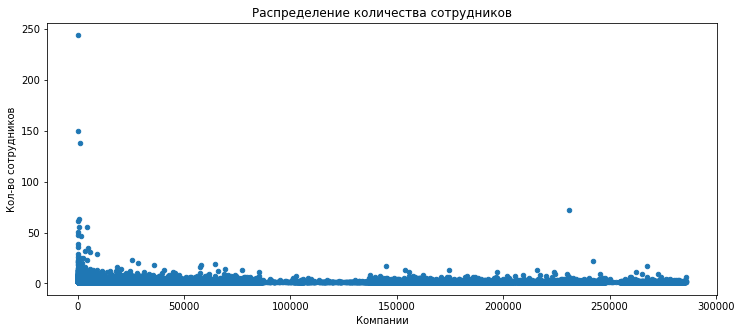

In [22]:
company_sizes = df_people.groupby('company_id')['id'].count().reset_index()
company_sizes.columns = ['company_id', 'employee_count']

# Основные статистики
company_sizes.plot(kind = 'scatter', x = 'company_id',y='employee_count',figsize = (12,5))
plt.title('Распределение количества сотрудников')
plt.xlabel('Компании')
plt.ylabel('Кол-во сотрудников')
plt.show()

Выберем границы для типов компаний.

1. Mini (1 сотрудник) - Размер стартапа
2. Small (2-10 сотрудников) - Малый бизнес
3. Middle (10-50 сотрудников) - Средний бизнес.
4. Big (50-100 сотрудников) - Крупные предприятия.
5. Huge (100+ сотрудников) - Большие корпорации

In [23]:
people_in_company = merge.groupby('company_id').agg({'id_edu':'count',
                                                     'id_employee':'count'}).reset_index()
def size_comp(x):
    if x<=1:
        return 'mini'
    elif x<=10:
        return 'small'
    elif x<=50:
        return 'middle'
    elif x<=100:
        return 'big'
    else: return 'huge'
people_in_company['size'] = people_in_company['id_employee'].apply(size_comp)
people_in_company['percent'] = round(people_in_company['id_edu']/people_in_company['id_employee'],2)
type_percent = people_in_company.groupby('size')['percent'].mean().sort_values()

In [24]:
# Код ревьюера
size_counts = people_in_company['size'].value_counts()

print("\nКоличество компаний в каждой категории размера:\n", size_counts)


Количество компаний в каждой категории размера:
 mini      14150
small      8542
middle      216
big          10
huge          4
Name: size, dtype: int64


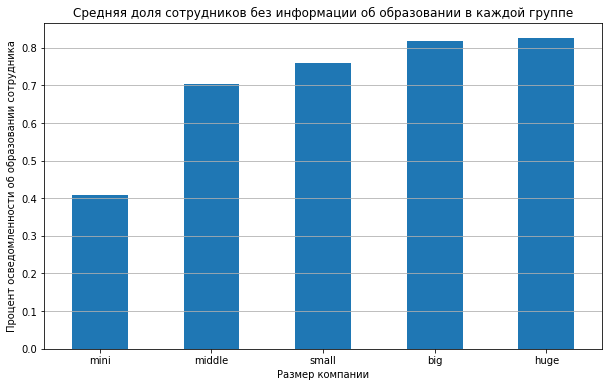

In [25]:
#Построение графика
plt.figure(figsize = (10,6))
type_percent.plot.bar(rot = 0)
plt.title('Cредняя доля сотрудников без информации об образовании в каждой группе')
plt.xlabel('Размер компании')
plt.ylabel('Процент осведомленности об образовании сотрудника')
plt.grid(axis = 'y')

Таблица degrees можно присоеденить по полю object_id — идентификатор сотрудника, и получить информацию о типе образования сотрудников, для отдельных отраслей.

В среднем осведомленность об образовании сотрудников в компаниях одинакова, выделяются стартапы, где информацией об образовании не сильно интересуются. Возможно это связано с тем, что такие проекты открывают сами студенты, не имеющие образования. Чем больше компания, тем больше знают об образовании, связано с тем, что риски больше и за работу допускают чаще квалифицированных работников.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установили, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оценили, можно ли использовать столбцы с именем `network_username` для объединения данных.

Объединить по столбцу network_username нельзя, так как встречаются пропуски

In [26]:
#Доля пропусков в столбце network_username
print(df_people['network_username'].isna().mean())
print(df_company_and_rounds['network_username'].isna().mean())

0.8285599601250943
0.5613158595608291


In [27]:
# Уникальные никнеймы сотрудников (из people)
usernames_people = set(df_people['network_username'].dropna().unique())

# Уникальные никнеймы компаний (из company_and_rounds)
usernames_companies = set(df_company_and_rounds['network_username'].dropna().unique())
common_usernames = usernames_people & usernames_companies  # Пересечение множеств
num_common = len(common_usernames)
total_unique_people = len(usernames_people)
total_unique_companies = len(usernames_companies)

# Процент никнеймов из people, которые есть в company_and_rounds
overlap_percent = (num_common / total_unique_people) * 100 if total_unique_people > 0 else 0
print(f"Уникальных никнеймов сотрудников: {total_unique_people}")
print(f"Уникальных никнеймов компаний: {total_unique_companies}")
print(f"Общих никнеймов: {num_common}")
print(f"Процент пересечения: {overlap_percent:.2f}%")

Уникальных никнеймов сотрудников: 38421
Уникальных никнеймов компаний: 79571
Общих никнеймов: 2199
Процент пересечения: 5.72%


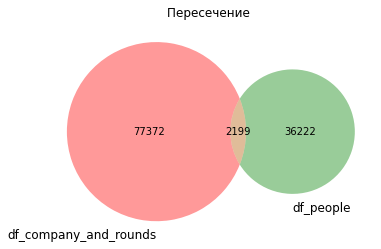

In [28]:
# Код ревьюера
!pip install matplotlib-venn -q
from matplotlib_venn import venn2
first_id = set(df_company_and_rounds['network_username'].dropna().unique())
second_id = set(df_people['network_username'].dropna().unique())
# Строим диаграмму Венна
venn2([first_id, second_id], set_labels=('df_company_and_rounds', 'df_people'))

# Отображаем график
plt.title("Пересечение ")
plt.show()


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Привели данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратили внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранили их связность и исключив возможные возникающие при этом ошибки, подготовили данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [29]:
# Таблица с основной информацией о компаниях
company= df_company_and_rounds.iloc[:, :13]
# Таблица с информацией о раундах финансирования
rounds = df_company_and_rounds.iloc[:, 13:]
display(company.info())
display(rounds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   funding_round_id     52928 non-null   float64       
 1   company_id_second    52928 non-null   float64       
 2   funded_at            52680 non-null   datetime64[ns]
 3   funding_round_type   52928 non-null   object        
 4   raised_amount        52928 non-null   float64       
 5   pre_money_valuation  52928 non-null   float64       
 6   participants         52928 non-null   float64       
 7   is_first_round       52928 non-null   float64       
 8   is_last_round        52928 non-null   float64       
 9   funded_at_year       217774 non-null  int32         
dtypes: datetime64[ns](1), float64(7), int32(1), object(1)
memory usage: 15.8+ MB


None

In [30]:
#Нормализация данных
company['name'] = company['name'].str.lower().str.strip()
company['status'] = company['status'].str.lower().str.strip()

In [31]:
#Проверка на дубликаты
print('Было:')
print('company',company.duplicated().sum())
company = company.drop_duplicates(keep = 'first').reset_index(drop = True)

print('rounds',rounds.duplicated().sum())
rounds = rounds.drop_duplicates(keep = 'first').reset_index(drop = True)
print('Стало:')
print('company ',company.duplicated().sum())
print('rounds',rounds.duplicated().sum())

Было:
company 21220
rounds 164845
Стало:
company  0
rounds 0


Деление таблицы на две сделали на основе повторно попавшегося столбца company_id, по которому скорее всего и присоединяли столбцы, также по количеству строк, так в новой таблице rounds количество строк с пропусками уменьшилось. В таблице company 21220 полных дубликатов, в rounds 164845 полных дубликатов.

In [32]:
#Обработка пропусков таблицы company
display(round(company.isna().mean(),2))

company_id           0.00
name                 0.00
category_code        0.37
status               0.00
founded_at           0.54
closed_at            0.99
domain               0.36
network_username     0.59
country_code         0.55
investment_rounds    0.00
funding_rounds       0.00
funding_total        0.00
milestones           0.00
dtype: float64

**Пропуски в столбцах:**
- category_code - 37%,
- founded_at - 54%,
- closed_at - 99%, пропуски связаны с тем, что компания продолжает работать
- domain - 36%, пропуски связаны с тем, что компания возможно не имеет сайт
- network_username - 59%, пропуски связаны с тем, что компании нет в сети
- country_code - 55%

In [33]:
#Обработка пропусков таблицы company
display(rounds.isna().mean())

funding_round_id       0.000019
company_id_second      0.000019
funded_at              0.004704
funding_round_type     0.000019
raised_amount          0.000019
pre_money_valuation    0.000019
participants           0.000019
is_first_round         0.000019
is_last_round          0.000019
funded_at_year         0.000000
dtype: float64

Пропуски <1%, можем их просто удалить.

In [34]:
#Удаляем пропуски
for i in rounds.columns:
    rounds = rounds.dropna(subset=[i])
display(rounds.isna().mean())

funding_round_id       0.0
company_id_second      0.0
funded_at              0.0
funding_round_type     0.0
raised_amount          0.0
pre_money_valuation    0.0
participants           0.0
is_first_round         0.0
is_last_round          0.0
funded_at_year         0.0
dtype: float64


## Шаг 3. Исследовательский анализ объединённых таблиц


### 3.1. Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице получилось порядка 40 тысяч компаний.

In [35]:
company_filt = company[(company['funding_rounds']>0) | (company['investment_rounds']>0) | (company['status']=='acquired')]
print(len(company_filt))

40747


In [36]:
display(company_filt.info())
display(round(company_filt.isna().mean(),2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.

None

company_id           0.00
name                 0.00
category_code        0.13
status               0.00
founded_at           0.32
closed_at            0.95
domain               0.12
network_username     0.49
country_code         0.15
investment_rounds    0.00
funding_rounds       0.00
funding_total        0.00
milestones           0.00
dtype: float64

Пропуски в столбцах (не влияют на анализ данных):
- founded_at - 32%,
- closed_at - 95%, пропуски связаны с тем, что компания продолжает работать
- domain - 12%, пропуски связаны с тем, что компания возможно не имеет сайт
- network_username - 49%, пропуски связаны с тем, что компании нет в сети
- country_code - 15%


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оценили, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратили внимание, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

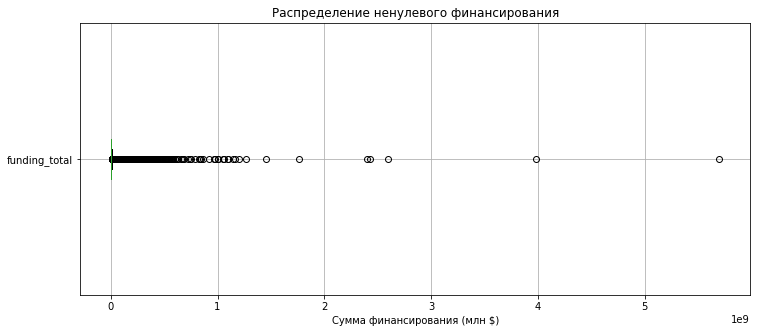

In [37]:
company_filt.boxplot(column = 'funding_total',vert = False,figsize= (12,5))
plt.title('Распределение ненулевого финансирования')
plt.xlabel('Сумма финансирования (млн $)')
plt.show()

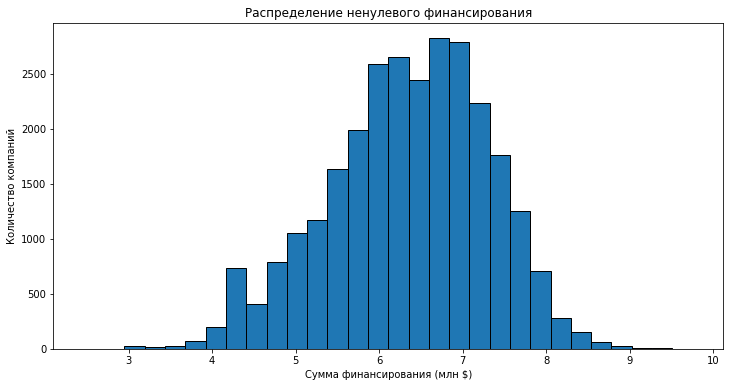

In [38]:
# Фильтруем нулевые значения для логарифма
non_zero = company_filt[company_filt['funding_total'] > 0]['funding_total']
plt.figure(figsize=(12, 6))
plt.hist(np.log10(non_zero), bins=30, edgecolor='black')
plt.title('Распределение ненулевого финансирования')
plt.xlabel('Сумма финансирования (млн $)')
plt.ylabel('Количество компаний')
plt.show()

In [39]:
display(company_filt['funding_total'].describe().round(2).astype(str))

count         40747.0
mean      10135609.64
std       56464359.98
min               0.0
25%               0.0
50%          600000.0
75%         5650650.0
max      5700000000.0
Name: funding_total, dtype: object

- 25% компаний имеют нулевое финансирование

- Медиана ($600K) меньше максимума

- Стандартное отклонение: ~$5.6 млн, что очень много

- Среднее ($10.1M) > 75%-го перцентиля

Проблемы:
- Среднее значение искажено выбросами (нерепрезентативно)
- Правило 1.5×IQR не работает (Q1 = $0 → нижняя граница = $0)

In [40]:
#Очень большие сделки
display(company_filt.sort_values(by = 'funding_total').tail())

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
175723,64365.0,carestream,biotech,operating,2007-01-01,NaT,carestream.com,carestream,USA,0.0,1.0,2.400000e+09,1.0
196390,5.0,socialnet,social,ipo,2004-02-01,NaT,socialnet.com,socialnet,USA,3.0,11.0,2.425700e+09,5.0
97700,242735.0,sigmacare,health,operating,2005-01-01,NaT,sigmacare.com,SigmaCareEHR,USA,0.0,1.0,2.600000e+09,0.0
159956,4843.0,"verizon communications, inc.",mobile,ipo,NaT,NaT,verizon.com,NaN,USA,3.0,2.0,3.985050e+09,3.0
4575,13219.0,clearwire,mobile,acquired,2003-10-01,NaT,clearwire.com,NaN,USA,0.0,4.0,5.700000e+09,2.0



### 3.3. Куплены забесплатно?

- Исследовали компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитали аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и указали, каким процентилям границы соответствуют.

In [41]:
acquisition_free = df_acquisition[(df_acquisition['price_amount'] <=1)]
finance = company_filt[company_filt['funding_total']>0]
free_companies = acquisition_free.merge(finance, left_on = 'acquired_company_id', right_on = 'company_id',how = 'inner')

In [42]:
print(f"Всего таких компаний: {len(free_companies)}")
print(f"Суммарное привлеченное финансирование: ${free_companies['funding_total'].sum()/1e6:.2f}M")
print(f"Среднее финансирование на компанию: ${free_companies['funding_total'].mean()/1e6:.2f}M")
print("\nРаспределение по сумме финансирования:")
print(free_companies['funding_total'].describe().round(2).astype(str))

Всего таких компаний: 1618
Суммарное привлеченное финансирование: $29371.49M
Среднее финансирование на компанию: $18.15M

Распределение по сумме финансирования:
count          1618.0
mean      18152961.94
std      144503027.47
min            3750.0
25%         2000000.0
50%         6000000.0
75%        15500000.0
max      5700000000.0
Name: funding_total, dtype: object


In [43]:
non_zero = free_companies['funding_total'].reset_index(drop = True)
q1 = non_zero.quantile(0.25)
q3 = non_zero.quantile(0.75)
iqr = q3 - q1
lower_bound = max(0, q1 - 1.5 * iqr)
upper_bound = q3 + 1.5 * iqr
print('Нижняя граница: ', lower_bound,', 0 персентиль', '\nВерхняя граница: ', round(upper_bound/1e6,2),'M $, 91 персентиль')

Нижняя граница:  0 , 0 персентиль 
Верхняя граница:  35.75 M $, 91 персентиль


In [44]:
percentelies = non_zero.quantile([0,0.9,0.91])
print(percentelies/1e6)

0.00     0.00375
0.90    33.01581
0.91    35.89400
Name: funding_total, dtype: float64


In [1]:
# Код ревьюера
from scipy import stats



# Определение процентилей для границ с использованием percentileofscore
lower_percentile = stats.percentileofscore(free_companies['funding_total'], lower_bound)
upper_percentile = stats.percentileofscore(free_companies['funding_total'], upper_bound)


print(f"Нижняя граница (ниже неё — выброс вниз): {lower_percentile:,.2f}")
print(f"Верхняя граница (выше неё — выброс вверх): {upper_percentile:,.2f}")

NameError: name 'free_companies' is not defined

In [45]:
display(free_companies.head())

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,14,318,314,cash,0,2006-10-01,314.0,reddit,web,acquired,2005-01-01,NaT,reddit.com,reddit,USA,0.0,1.0,100000.0,3.0
1,65,146,698,cash,0,2007-08-01,698.0,maya's mom,web,acquired,NaT,NaT,mayasmom.com,NaN,USA,0.0,1.0,1000000.0,2.0
2,67,156,718,cash,0,2007-08-01,718.0,glimpse,ecommerce,acquired,NaT,NaT,glimpse.com,NaN,USA,0.0,1.0,4000000.0,0.0
3,87,1035,175,cash,0,2007-10-01,175.0,newsvine,web,acquired,2005-03-31,NaT,newsvine.com,NaN,USA,0.0,1.0,1250000.0,0.0
4,115,396,1582,cash,0,2007-12-01,1582.0,beliefnet,web,acquired,2008-01-01,NaT,beliefnet.com,eliefnet,USA,0.0,1.0,7000000.0,3.0


Сделки с акциями могли быть оформлены как "cash" из-за ограничений датасета. <br>
Вместо оплаты могли воспользоваться акциями компании.<br>
Символическая стоимость при смене владельца внутри группы.<br>
Технические сделки (например, поглощение дочерних структур).


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

In [46]:
# Вычисляем компании с типично высокими ценами
company_prices = df_acquisition.merge(company_filt, left_on = 'acquired_company_id', right_on = 'company_id',how = 'inner')
company_prices_group= company_prices.groupby('category_code')['price_amount'].agg(['median'])/1e6
company_group = company_prices_group.round(2).sort_values(by = 'median',ascending = False)
print(company_group.astype(str) + 'M $')

                    median
category_code             
nanotech          584.0M $
manufacturing      72.0M $
real_estate        50.0M $
automotive         43.0M $
biotech            13.2M $
hospitality        12.5M $
finance             0.6M $
news                0.0M $
nonprofit           0.0M $
other               0.0M $
photo_video         0.0M $
public_relations    0.0M $
advertising         0.0M $
search              0.0M $
security            0.0M $
semiconductor       0.0M $
social              0.0M $
software            0.0M $
sports              0.0M $
transportation      0.0M $
travel              0.0M $
network_hosting     0.0M $
messaging           0.0M $
music               0.0M $
fashion             0.0M $
cleantech           0.0M $
consulting          0.0M $
design              0.0M $
ecommerce           0.0M $
education           0.0M $
enterprise          0.0M $
games_video         0.0M $
mobile              0.0M $
hardware            0.0M $
health              0.0M $
l

In [47]:
#Топ категорий по типично высокими ценами
company_group=company_group.reset_index()
print(company_group['category_code'][:7])

0         nanotech
1    manufacturing
2      real_estate
3       automotive
4          biotech
5      hospitality
6          finance
Name: category_code, dtype: object


В топе 7 компаний, так как суммы сделок остальных компаний равна 0.

In [48]:
#Отфильтрованный датафрейм по столбцу price_amount без выбросов
companies_acquisition = df_acquisition.merge(company_filt, left_on = 'acquired_company_id', right_on = 'company_id',how = 'inner')
company_no_max = companies_acquisition[companies_acquisition['price_amount']<=companies_acquisition['price_amount'].quantile(0.95)]

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Удачное решение взять высокий процентиль

In [53]:
company_diff_group= company_no_max.groupby('category_code')['price_amount'].agg(['min','max'])/1e6
company_diff_group['diff'] = company_diff_group['max']-company_diff_group['min']
company_diff = company_diff_group[['diff']].round(2).sort_values(by='diff',ascending = False)
print(company_diff.astype(str) + 'M $')

                       diff
category_code              
cleantech          358.0M $
semiconductor      356.0M $
public_relations   355.0M $
web                352.0M $
manufacturing      351.0M $
biotech           350.72M $
software           350.0M $
ecommerce          350.0M $
enterprise         350.0M $
network_hosting    350.0M $
games_video        350.0M $
mobile             350.0M $
hardware           345.0M $
security           342.5M $
other              325.0M $
medical            325.0M $
advertising        321.0M $
news               315.0M $
consulting         295.0M $
music              280.0M $
finance            280.0M $
fashion            270.0M $
analytics          263.0M $
sports             260.0M $
transportation     230.0M $
search             225.0M $
travel             198.0M $
hospitality        180.0M $
messaging          169.0M $
social             151.0M $
health             150.0M $
photo_video         60.0M $
real_estate         50.0M $
automotive          

In [54]:
#Топ категорий по наибольшим разбросом цен за стартап
company_diff = company_diff_group['diff'].round(2).sort_values(ascending = False)
print(company_diff.astype(str) + 'M $')

category_code
cleantech            358.0M $
semiconductor        356.0M $
public_relations     355.0M $
web                  352.0M $
manufacturing        351.0M $
biotech             350.72M $
software             350.0M $
ecommerce            350.0M $
enterprise           350.0M $
network_hosting      350.0M $
games_video          350.0M $
mobile               350.0M $
hardware             345.0M $
security             342.5M $
other                325.0M $
medical              325.0M $
advertising          321.0M $
news                 315.0M $
consulting           295.0M $
music                280.0M $
finance              280.0M $
fashion              270.0M $
analytics            263.0M $
sports               260.0M $
transportation       230.0M $
search               225.0M $
travel               198.0M $
hospitality          180.0M $
messaging            169.0M $
social               151.0M $
health               150.0M $
photo_video           60.0M $
real_estate           50.0

In [55]:
#Топ категорий по наибольшим разбросом цен за стартап
company_diff=company_diff.reset_index()
display(company_diff['category_code'][:6])

0           cleantech
1       semiconductor
2    public_relations
3                 web
4       manufacturing
5             biotech
Name: category_code, dtype: object


### 3.5. Сколько раундов продержится стартап перед покупкой

- Проанализировали столбец `funding_rounds`. Исследовали значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Построили график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы.

In [56]:
mean_rounds = company_filt.groupby('status')['funding_rounds'].mean().sort_values()
print(mean_rounds)

status
acquired     0.523526
closed       1.381453
operating    1.522658
ipo          1.934375
Name: funding_rounds, dtype: float64


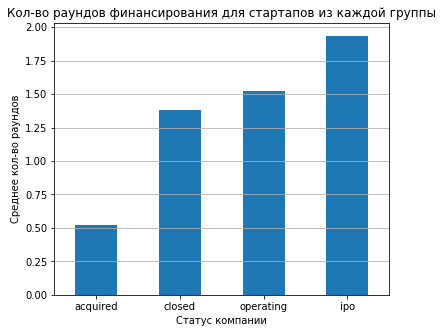

In [57]:
mean_rounds.plot.bar(rot = 0, figsize = (6,5))
plt.title('Кол-во раундов финансирования для стартапов из каждой группы')
plt.xlabel('Статус компании')
plt.ylabel('Среднее кол-во раундов')
plt.grid(axis = 'y')
plt.show()

Больше всего раундов финансирования у компаний, которые имеют статус ipo, меньше всего у acquired.<br>
Компании, вышедшие на IPO, прошли почти в 4 раза больше раундов, чем приобретённые (1.93 vs 0.52)<br>
Действующие стартапы имеют больше раундов, чем закрытые (1.52 vs 1.38)

In [58]:
#Взглянем на компании, получившие большее количество раундов финансирования
display(company_filt[company_filt['status']=='ipo'].sort_values(by = 'funding_rounds').tail(5))

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
95234,24028.0,intrexon corporation,biotech,ipo,1998-01-01,NaT,dna.com,NaN,USA,0.0,11.0,437592000.0,0.0
3445,12352.0,solarcity,cleantech,ipo,2006-01-01,NaT,solarcity.com,solarcity,USA,0.0,13.0,789040000.0,3.0
149290,37366.0,galectin therapeutics,biotech,ipo,2000-12-01,NaT,galectintherapeutics.com,GalectinGALT,USA,0.0,13.0,9514000.0,2.0
103759,24869.0,perficient,consulting,ipo,1998-01-01,NaT,perficient.com,Perficient,USA,0.0,13.0,57923500.0,2.0
123601,26802.0,telecommunication systems,mobile,ipo,NaT,NaT,telecomsys.com,TeleComSys,USA,0.0,13.0,109550000.0,2.0



## Шаг 4. Итоговый вывод и рекомендации


### Что было сделано:
**Предобработка данных:**

- Проведена загрузка и первичный анализ 5 датасетов

- Исправлены названия столбцов (приведены к snake_case)

- Преобразованы типы данных для временных меток

- Выполнена обработка пропусков с анализом их природы

- Датсет company_and_rounds разделен на 2 логические таблицы

**Аналитическая часть:**

- Исследована динамика раундов финансирования по годам

- Проанализирована связь между размером компании и полнотой данных об образовании сотрудников

- Оценена возможность объединения данных по network_username

- Проведен анализ выбросов в финансировании

- Исследованы компании, проданные за $0-1

- Определены категории стартапов с наибольшими ценами покупки

- Проанализирована связь количества раундов и статуса компании

**Финансирование:**

- Максимальный типичный размер раунда ($5.5M) наблюдался в 2005 году

- 25% компаний имеют нулевое финансирование
- В 2013 году было зафиксировано наибольшее количество раундов (11 072), но средний размер инвестиций снизился до $1.2 млн.

**Сделки:**

- Обнаружено 1618 компаний, проданных за 0-1 доллар при среднем финансировании ($18.5M)
- Наиболее вероятные причины таких сделок:<br>
Передача акций вместо денег.<br>
Символическая стоимость при смене владельца внутри группы.<br>
Технические сделки (например, поглощение дочерних структур).<br>

- Наибольшие цены покупки в категориях: nanotech, manufacturing, real_estate

**Раунды и статусы:**

- IPO-компании прошли в среднем 1.93 раунда

- Приобретенные компании - только 0.52 раунда

- Действующие стартапы - 1.52 раунда


**Для бизнеса:**

Сфокусироваться на cleantech, semiconductor, public_relations как наиболее перспективных категориях, <br>
так как можно подобрать компанию под любой бюджет.
Разработать отдельные критерии для оценки "дешевых" приобретений ($0-1)<br>
Компании, прошедшие более 1 раунда, чаще остаются на рынке или выходят на IPO.<br>
Стартапы с 0–1 раундом чаще продаются, но по более низкой цене.<br>
